
*Análise*



<Figure size 640x480 with 0 Axes>

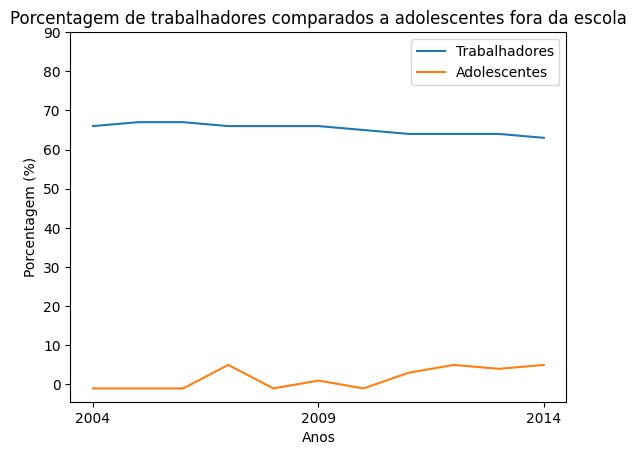

In [5]:
# APS1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

# ----------------------------------- #

df = pd.read_csv('csv/jobs.csv', sep=',', encoding='latin1', decimal='.')
df = df.drop(labels=['Series Name', 'Series Code', 'Country Code'], axis=1)
df = df.replace('(?<!\.)\.\.(?!\.)', -1, regex=True)

df2 = pd.read_csv('csv/adolescent.csv', sep=',', encoding='latin1', decimal='.')
df2 = df2.drop(labels=['Series Name', 'Series Code', 'Country Code'], axis=1)
df2 = df2.replace('(?<!\.)\.\.(?!\.)', -1, regex=True)

plt.style.use('default')
plt.figure()
fig, ax = plt.subplots()

# ----------------------------------- #

anosBrasil = df.iloc[27]
anos = []
data = []
i=0
for ano in anosBrasil.index:
    if i <= 10:
        string = str(i+2004) + ' [YR' + str(i+2004) + ']'
        anos.append(i+2004)
        data.append(int(float(anosBrasil[string])))
    i+=1
plt.plot(anos, data)

# ----------------------------------- #

adolesc = df2.iloc[27]
anos = []
data = []
i=0
for ano in adolesc.index:
    if i <= 10:
        string = str(i+2004) + ' [YR' + str(i+2004) + ']'
        anos.append(i+2004)
        data.append(int(float(adolesc[string])))
    i+=1
plt.plot(anos, data)

# ----------------------------------- #

ax.legend(["Trabalhadores", "Adolescentes"])
plt.xticks(range(2004, 2017, 5))
plt.yticks(range(0, 100, 10))
plt.title('Porcentagem de trabalhadores comparados a adolescentes fora da escola')
plt.xlabel('Anos')
plt.ylabel('Porcentagem (%)')
plt.show()

Novo indicador, utilizado para comparação: Adolescents out of school (% of lower secondary school age). Pode se relacionar com o indicador anterior pois alguns adolescentes acabam saindo da escola para trabalhar antes de completarem o ensino médio (tanto por questão de falta de perspectiva como necessidade).



#Como a figura, a correlação e a variância indicam que a hipótese levantada se confirma ou não.